#<a id="agenda">Agenda</a>

1.   [Introduction to NLP](#intro)
2.   [Text Preprocessing](#Preprocessing)
  1.   [Noise Removal](#noise)
  2.   [Lexicon Normalization](#lexicon)
      1.   [Lemmatization](#lemmatization)
      2.   [Stemming](#stemming)
  3.   [Object Standardization](#standardization)
3.   [Text to Features (Feature Engineering on text data)](#Text_to_Features)
  1.   [Syntactical Parsing](#Syntactical_Parsing)
      1.   [Dependency Grammar](#Dependency_Grammar)
      2.   [Part of Speech Tagging](#Part_of_Speech_Tagging)
  2.   [Entity Parsing](#Entity_Parsing)
      1.   [Phrase Detection](#Phrase_Detection)
      2.   [Named Entity Recognition](#Named_Entity_Recognition)
      3.   [Topic Modelling](#Topic_Modelling)
      4.   [N-Grams](#N_Grams)
  3.   [Statistical features](#Statistical_features)
      1.   [TF - IDF](#TF_IDF)
      2.   [Frequency / Density Features](#Frequency_Density_Features])
      3.   [Readability Features](#Readability_Features)
  4.   [Word Embeddings](#Word_Embeddings)
4.   [Important tasks of NLP](#Important_tasks_of_NLP)
  1.   [Text Classification](#Text_Classification)
  2.   [Text Matching](#Text_Matching)
      1.   [Levenshtein Distance](#Levenshtein_Distance)
      2.   [Phonetic Matching](#Phonetic_Matching)
      3.   [Flexible String Matching](#Flexible_String_Matching)
  3.   [Coreference Resolution](#Coreference_Resolution)
  4.   [Other Problems](#Other_Problems)
5.   [Important NLP libraries](#Important_NLP_libraries)

#<a id="intro">Introduction to NLP</a>

**Tokenization** : Process of converting a text into tokens

**Tokens** : Words or entities present in the text

**Text object** : A sentence or a phrase or a word or an article



In [ ]:
# Installing libraries
! pip install -U nltk

In [ ]:
import nltk
nltk.download() # punkt, stopwords, wordnet, averaged_perceptron_tagger, maxent_ne_chunker, words

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Package punkt is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet


      Package wordnet is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> averaged_perceptron_tagger


        /root/nltk_data...
      Package averaged_perceptron_tagger is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> maxent_ne_chunker


      Package maxent_ne_chunker is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> words


      Package words is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

#Language Models



*   Language models are statistical models that are trained on large amounts of text data to understand and generate human language.
*   They capture the probabilities and patterns of word sequences in order to predict and generate coherent and contextually appropriate text.

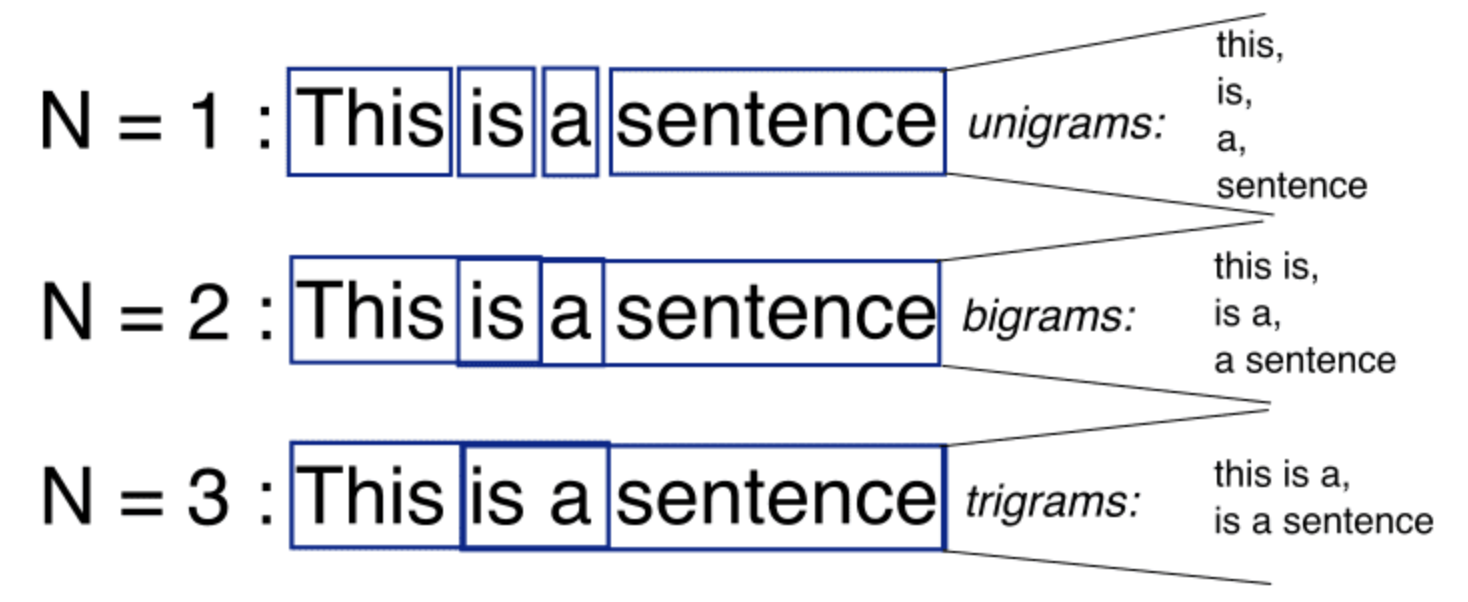

In [ ]:
from collections import defaultdict
import random

# Training data
sentences = [
    "I love cats",
    "Cats are adorable",
    "Dogs are loyal",
    "I have a dog",
    "Cats and dogs are friends",
    "I enjoy playing with cats",
    "Dogs love to fetch",
    "I prefer cats over dogs",
    "Cats make great companions",
    "Dogs are man's best friend",

]

# Function to generate n-grams from sentences
def generate_ngrams(sentences, n):
    ngrams = defaultdict(list)
    for sentence in sentences:
        words = sentence.lower().split()
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i+n-1])
            next_word = words[i+n-1]
            ngrams[ngram].append(next_word)
    return ngrams

# Generate 2-gram and 3-gram models
ngram_2 = generate_ngrams(sentences, 2)
ngram_3 = generate_ngrams(sentences, 3)

# Predict the next word based on 2-gram
seed_2 = random.choice(list(ngram_2.keys()))
next_word_2 = random.choice(ngram_2[seed_2])

# Predict the next word based on 3-gram
seed_3 = random.choice(list(ngram_3.keys()))
next_word_3 = random.choice(ngram_3[seed_3])

# Print the predictions
print("Using 2-gram model:")
print(f"Seed: '{seed_2}', Predicted Next Word: '{next_word_2}'")
print()
print("Using 3-gram model:")
print(f"Seed: '{seed_3}', Predicted Next Word: '{next_word_3}'")


Using 2-gram model:
Seed: 'over', Predicted Next Word: 'dogs'

Using 3-gram model:
Seed: 'i prefer', Predicted Next Word: 'cats'


#<a id="Preprocessing">Text Preprocessing</a>

The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.

##<a id="noise">Noise Removal</a>
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.

For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, social media entities (mentions, hashtags), punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

In [ ]:
# Sample code to remove noisy words from a text

noise_list = ["is", "a", "this", "..."]
def remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

In [ ]:
print(remove_noise("this is a sample text"))

sample text


In [ ]:
# Sample code to remove a regex pattern
import re

def remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text)
    for i in urls:
        input_text = re.sub(i.group().strip(), '', input_text)
    return input_text

regex_pattern = "#[\w]*"

In [ ]:
remove_regex("remove this #hashtag from analytics vidhya", regex_pattern)

'remove this  from analytics vidhya'

In [ ]:
# Removing noise using nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

def remove_noise(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove social media entities (mentions and hashtags)
    text = re.sub(r"@\w+|\#\w+", "", text)

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Reconstruct the text
    clean_text = " ".join(tokens)

    return clean_text

# Example usage
text = "I am excited to launch our new #product! Check it out at www.example.com #excitingtimes"
clean_text = remove_noise(text)
print(clean_text)


excited launch new Check


##<a id="lexicon">Lexicon Normalization</a>

It is a  process of standardizing and normalizing words or phrases in text. It is a key step in natural language processing (NLP) tasks and offers several benefits:

**Consistent Text Representation** : Lexicon normalization ensures that words with the same meaning are represented consistently throughout the text.

**Reduces Data Sparsity** : Normalizing words helps in reducing data sparsity by collapsing different word forms into a single form.

**Efficient Text Processing** : Lexicon normalization helps in reducing the dimensionality



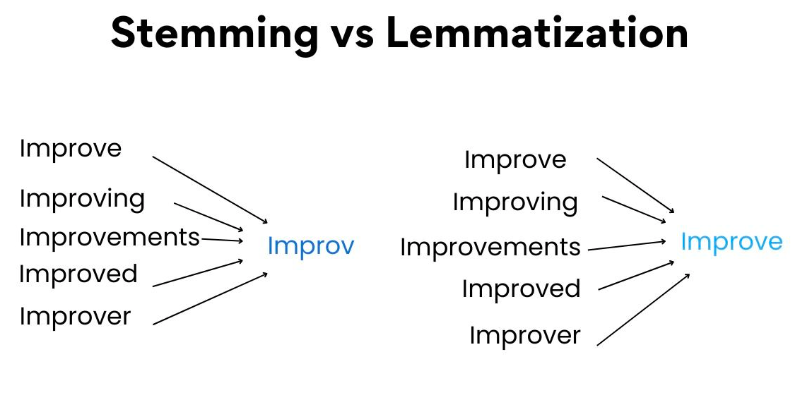

###<a id="stemming">Stemming</a>

Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [ ]:
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "multiplying"
print(stem.stem(word))

word = "improving"
print(stem.stem(word))
word = "improved"
print(stem.stem(word))


multipli
improv
improv


###<a id="lemmatization">Lemmatization</a>

Step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

Here are some common POS tags that can be used with the lemmatize() method in NLTK:

*   "n": noun
*   "v": verb
*   "a": adjective
*   "r": adverb

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

word = "multiplying"
print(lem.lemmatize(word, "v"))

word = "improving"
print(lem.lemmatize(word, "v"))
word = "improved"
print(lem.lemmatize(word, "v"))


multiply
improve
improve


##<a id="standardization">Object Standardization</a>

Text data often contains words or phrases which are not present in any standard lexical dictionaries. These pieces are not recognized by search engines and models.

In [ ]:
lookup_dict = {'rt': 'Retweet', 'dm': 'direct message', 'awsm': 'awesome', 'luv': 'love'}

def _lookup_words(input_text):
    words = input_text.split()
    new_words = []

    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word)

    new_text = " ".join(new_words)
    return new_text

_lookup_words("RT this is a retweeted tweet by Shivam Bansal")

'Retweet this is a retweeted tweet by Shivam Bansal'

#<a id="Text_to_Features">3. Text to Features (Feature Engineering on text data)</a>



## <a id="Syntactical_Parsing">3.1 Syntactical Parsing / Syntax Analysis</a>


Syntactical parsing involves the analysis of words in the sentence for grammar and their arrangement in a manner that shows the relationships among the words. Dependency Grammar and Part of Speech tags are the important attributes of text syntactics.

###<a id="Dependency_Grammar">A. Dependency Grammar</a>



It is used for analyzing the grammatical structure of sentences and determining the syntactic relationships between words.



*   Focuses on analyzing the grammatical structure of sentences.
*   Determines the syntactic roles of words (nouns, verbs, adjectives, etc.) and their relationships (subject, object, modifier) within a sentence.

Helps in
*   Improved text understanding: Syntactic parsing provides insights into the sentence's syntactic relationships, aiding in deeper understanding and semantic analysis.
*   Information extraction: Parsing helps in extracting specific information from text by identifying key grammatical elements and their connections.
*   Sentiment analysis: Syntactic structures help capture sentiment-bearing phrases and their modifiers, facilitating more accurate sentiment analysis.

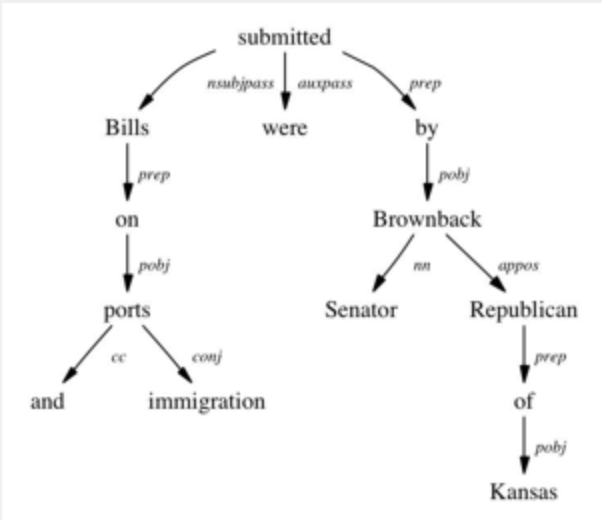

In [ ]:
import spacy
from spacy import displacy
from IPython.display import display, HTML

def visualize_syntactic_tree(sentence):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    options = {
        "compact": True,
        "bg": "#ffffff",
        "color": "#000000",
        "font": "Source Sans Pro"
    }
    html = displacy.render(doc, style="dep", options=options, jupyter=True)
    display(HTML(html))

sentence = "Bills on ports and immigration were submitted by Senator Brownback, Republican of Kansas."
visualize_syntactic_tree(sentence)


<IPython.core.display.HTML object>

The tree shows that “submitted” is the root word of this sentence, and is linked by two sub-trees (subject and object subtrees).



###<a id="Part_of_Speech_Tagging">B. Part of Speech Tagging</a>


Part of Speech tagging is used for many important purposes in NLP.


*   POS tagging is the process of assigning the appropriate POS labels to words in a given text or sentence.
*   POS tags provide valuable linguistic information about the role, function, and syntactic behavior of words within a sentence.


Refer the above example.

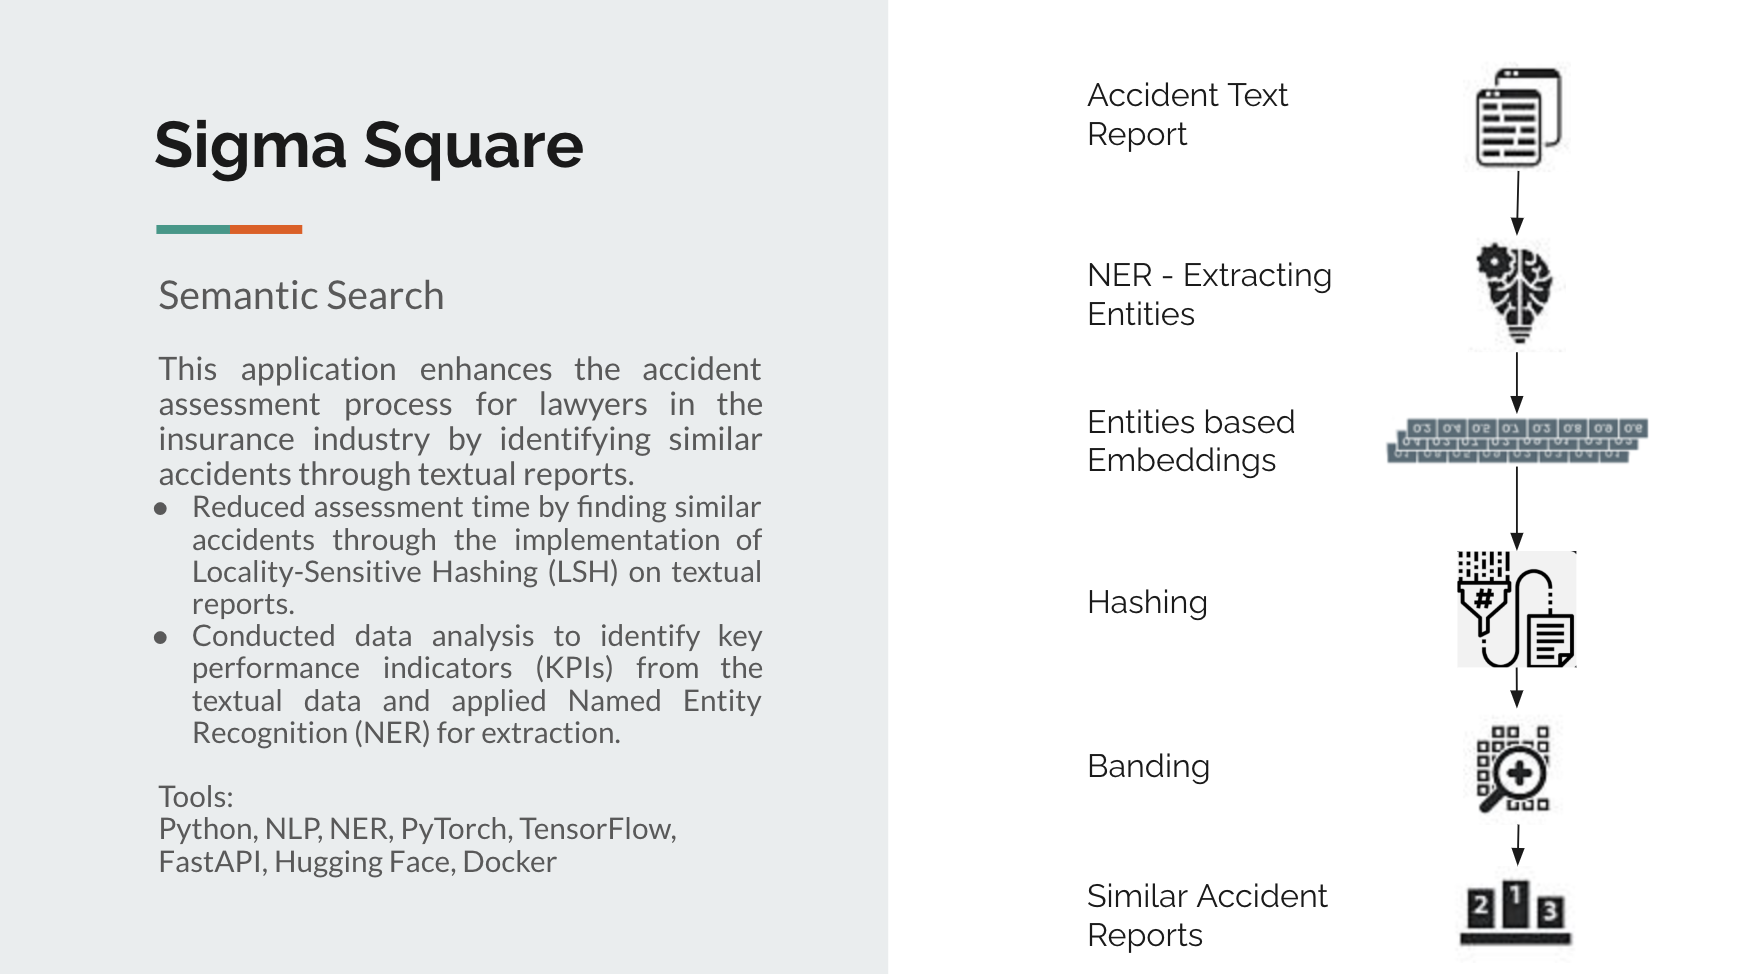

##<a id="Entity_Parsing">3.2 Entity Extraction (Entities as features)
</a>


Entities are defined as the most important chunks of a sentence – noun phrases, verb phrases or both. Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing.

###<a id="Named_Entity_Recognition">A. Named Entity Recognition</a>


The process of detecting the named entities such as person names, location names, company names etc from the text is called as NER. For example :

Sentence – Sergey Brin, the manager of Google Inc. is walking in the streets of New York.

Named Entities –  ( “person” : “Sergey Brin” ), (“org” : “Google Inc.”), (“location” : “New York”)






In [ ]:
import spacy

def perform_ner(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    ner_results = []
    for ent in doc.ents:
        ner_results.append((ent.text, ent.label_))

    return ner_results

text = "Apple Inc. is planning to open a new store in New York City."

ner_results = perform_ner(text)
print(ner_results)


[('Apple Inc.', 'ORG'), ('New York City', 'GPE')]


###<a id="Topic_Modelling">B. Topic Modelling</a>
  

Topic modeling is a process of automatically identifying the topics present in a text corpus, it derives the hidden patterns among the words in the corpus in an unsupervised manner. Topics are defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model results in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

In [ ]:
import gensim
from gensim import corpora

doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc_complete = [doc1, doc2, doc3]
doc_clean = [doc.split() for doc in doc_complete]

# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
ldamodel = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = ldamodel(doc_term_matrix, num_topics=3, id2word=dictionary, passes=50)

# Results
print(ldamodel.print_topics())


[(0, '0.029*"My" + 0.029*"my" + 0.029*"sister" + 0.029*"to" + 0.029*"suggest" + 0.029*"cause" + 0.029*"and" + 0.029*"Doctors" + 0.029*"that" + 0.029*"pressure."'), (1, '0.089*"to" + 0.051*"my" + 0.051*"sister" + 0.051*"My" + 0.051*"is" + 0.051*"not" + 0.051*"Sugar" + 0.051*"have" + 0.051*"bad" + 0.051*"consume."'), (2, '0.064*"driving" + 0.037*"time" + 0.037*"father" + 0.037*"of" + 0.037*"around" + 0.037*"a" + 0.037*"practice." + 0.037*"spends" + 0.037*"lot" + 0.037*"dance"')]


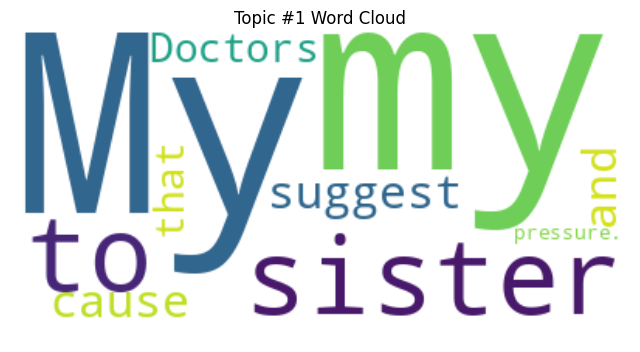

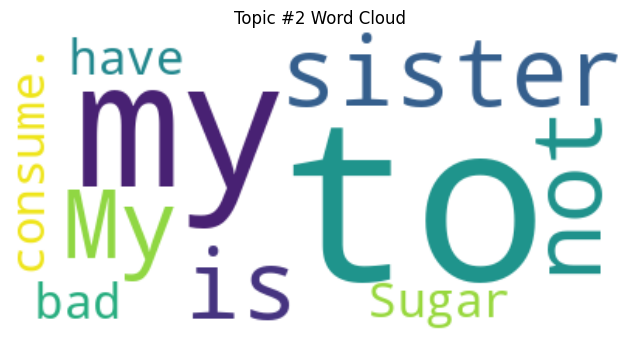

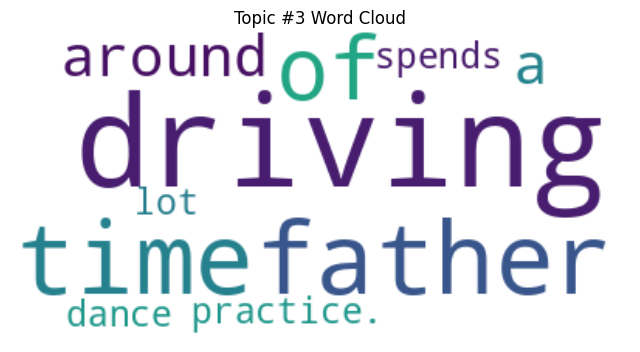

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Results
topics = ldamodel.print_topics(num_topics=3)

# Generate word clouds for each topic
for i, topic in topics:
    topic_words = topic.split('+')
    wordcloud_data = []
    for word_prob in topic_words:
        word_prob = word_prob.strip()
        prob, word = word_prob.split('*')
        word = word.replace('"', '').strip()
        wordcloud_data.append((word, float(prob)))

    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(wordcloud_data))

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{i + 1} Word Cloud')
    plt.axis('off')
    plt.show()

###<a id="N_Grams">C. N-Grams as Features</a>
  

A combination of N words together are called N-Grams. N grams (N > 1) are generally more informative as compared to words (Unigrams) as features. Also, bigrams (N = 2) are considered as the most important features of all the others.

Where we can apply?

Text Classification, Language Modeling, and Named Entity Recognition (NER).




Text Classification:
In text classification tasks, n-grams can be used as features to represent the text. For example, in sentiment analysis, bi-grams (2-grams) or tri-grams (3-grams) can capture important word combinations that contribute to the sentiment of a sentence. Consider the sentence: "The movie was not good." By using bi-grams, we can capture the phrase "not good" as a single feature, which provides better context for sentiment analysis.

Negative Sentence:
"I didn't enjoy the movie at all."

3-grams: ["I didn't enjoy", "didn't enjoy the", "enjoy the movie", "the movie at", "movie at all"]
In this negative sentence, the 3-grams capture the sentiment of not enjoying the movie.
Positive Sentence:
"The food was absolutely delicious."

3-grams: ["The food was", "food was absolutely", "was absolutely delicious"]
In this positive sentence, the 3-grams highlight the sentiment of the food being delicious.

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    output = []
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

text = "I love natural language processing"
ngrams = generate_ngrams(text, 2)  # Generate bi-grams (2-grams)
print(ngrams)


[['I', 'love'], ['love', 'natural'], ['natural', 'language'], ['language', 'processing']]


##<a id="Statistical_features">3.3 Statistical features</a>


Statistical features in NLP refer to the numerical representations of text data that are derived from various statistical techniques.

We need statistical features in NLP for several reasons:

**Machine Learning Models**: Statistical features serve as input features for machine learning models in NLP tasks. By converting text data into numerical representations, we can apply various statistical and machine learning algorithms for tasks like text classification, sentiment analysis, and information retrieval.

**Quantitative Analysis**: Statistical features enable quantitative analysis of text data. They allow us to measure the occurrence, distribution, and relationships of words, phrases, or patterns within a text corpus. This analysis can provide insights into the characteristics, trends, and patterns of the data, helping in tasks like text mining, topic modeling, and information extraction.

**Comparisons and Similarity**: Statistical features facilitate comparisons and similarity measurements between text documents. By quantifying text data, we can calculate various similarity metrics such as cosine similarity, Jaccard similarity, or Euclidean distance. These measures enable tasks like document clustering, information retrieval, and recommendation systems.

In summary, statistical features provide a quantitative representation of text data, enabling us to apply machine learning techniques, reduce dimensionality, perform quantitative analysis, and measure similarities in NLP tasks. They play a crucial role in extracting meaningful information and deriving insights from text data.








###<a id="TF_IDF">A. TF - IDF</a>

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects the importance of a term in a document within a collection or corpus of documents. TF-IDF is commonly used in information retrieval and text mining tasks.

TF (Term Frequency) measures the frequency of a term within a document. It indicates how often a term appears in a document relative to the total number of terms in that document. TF is calculated using the formula:

**TF(term, document) = (Number of occurrences of the term in the document) / (Total number of terms in the document)**


IDF (Inverse Document Frequency) measures the importance of a term in the entire corpus. It takes into account the rarity of the term across the documents in the corpus. IDF is calculated using the formula:

**IDF(term) = log((Total number of documents) / (Number of documents containing the term))**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is sample document.', 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)
print(X)

  (0, 1)	0.34520501686496574
  (0, 4)	0.444514311537431
  (0, 2)	0.5844829010200651
  (0, 7)	0.5844829010200651
  (1, 3)	0.652490884512534
  (1, 0)	0.652490884512534
  (1, 1)	0.3853716274664007
  (2, 5)	0.5844829010200651
  (2, 6)	0.5844829010200651
  (2, 1)	0.34520501686496574
  (2, 4)	0.444514311537431


###<a id="Frequency_Density_Features">B. Count / Density / Readability Features</a>

Count or Density based features can also be used in models and analysis. These features might seem trivial but shows a great impact in learning models. Some of the features are: Word Count, Sentence Count, Punctuation Counts and Industry specific word counts.



**Word count** refers to the process of counting the total number of words in a given text or document. It is a simple and fundamental measure used in various applications in natural language processing (NLP) and text analysis.

How?

You can simply count the number of words in a given text or document



In [ ]:
sentences = [
    "The sky is blue.",
    "I love eating ice cream.",
    "She plays the piano beautifully.",
    "The quick brown fox jumps over the lazy dog.",
    "I have a dream."
]

word_count_dict = {}

# Calculate word count for each word
for sentence in sentences:
    words = sentence.split()
    for word in words:
        if word in word_count_dict:
            word_count_dict[word] += 1
        else:
            word_count_dict[word] = 1

print("Total word count:", len(word_count_dict))
# Sort the word count dictionary by values in descending order
sorted_word_counts = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top word counts
top_word_counts = 5  # Specify the number of top word counts to display
for word, count in sorted_word_counts[:top_word_counts]:
    print(f"{word}: {count}")


Total word count: 24
The: 2
I: 2
the: 2
sky: 1
is: 1


##<a id="Word_Embeddings">3.4 Word Embedding (text vectors)</a>


Word embedding is the modern way of representing words as vectors. The aim of word embedding is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are widely used in deep learning models such as Convolutional Neural Networks and Recurrent Neural Networks.


*   Word Embeddings are vector representations of words in a high-dimensional space
*   They capture the semantic and syntactic meaning of words based on their contextual relationships.
*   Word embeddings are learned from large text corpora using techniques like Word2Vec, GloVe, or FastText
*   They provide dense, continuous representations compared to traditional sparse representations like one-hot encoding.
*   Word embeddings enable us to perform various NLP tasks more effectively and efficiently.


In [ ]:
from gensim.models import Word2Vec
sentences = [['data', 'science'], ['vidhya', 'science', 'data', 'analytics'], ['machine', 'learning'], ['deep', 'learning']]

# train the model on your corpus
model = Word2Vec(sentences, min_count=1)

print(model.wv.similarity('data', 'science'))
# Output: 0.21461837

print(model.wv['learning'])
# Output: array([-0.00757215, -0.00615012,  0.00701472, -0.00174821, ...])


-0.02367166
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e

#<a id="Important_tasks_of_NLP">4. Important tasks of NLP</a>


##<a id="Text_Classification">4.1 Text Classification</a>


##<a id="Text_Matching">4.2 Text Matching</a>

###<a id="Levenshtein_Distance">A. Levenshtein Distance</a>


###<a id="Phonetic_Matching">B. Phonetic Matching</a>


###<a id="Flexible_String_Matching">C. Flexible String Matching</a>


##<a id="Coreference_Resolution">4.3 Coreference Resolution</a>


##<a id="Other_Problems">4.4 Other Problems</a>


#<a id="Important_NLP_libraries">5. Important NLP libraries</a>